# Exercise 1: Matrix Transformations



<function matplotlib.pyplot.show(close=None, block=None)>

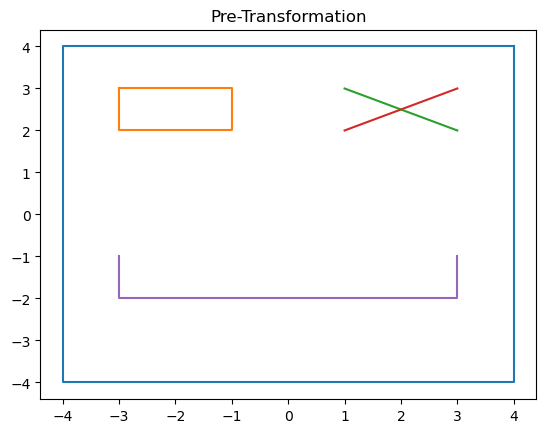

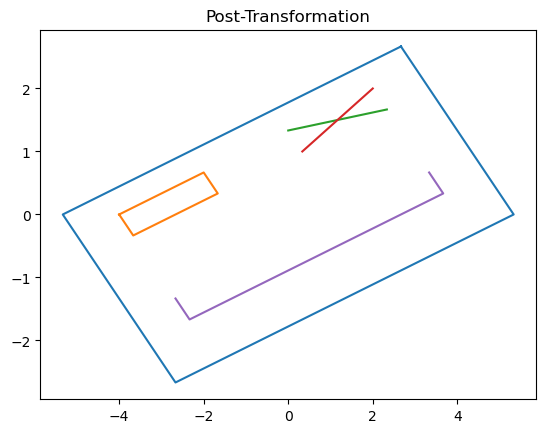

In [99]:
import numpy as np
import matplotlib.pyplot as plt

a = int(4)
b = int(3)

graph = []
graph.append(np.array([[a,a], [a,-a], [-a,-a], [-a,a], [a,a]]))
graph.append(np.array([[1-a,a-1], [-a/4,a-1], [-a/4,a/2], [1-a,a/2], [1-a,a-1]]))
graph.append(np.array([[a/4,a-1], [a-1,a/2]]))
graph.append(np.array([[a-1,a-1], [a/4,a/2]]))
graph.append(np.array([[a-1,-a/4], [a-1,-a/2], [1-a,-a/2], [1-a,-a/4]]))

matrixA = np.matrix([[b,1], [-1,1]])
matrixA = np.multiply(1/b, matrixA)

plt.figure(1)
plt.title("Pre-Transformation")

for i in range(0, len(graph)):
    x,y = graph[i].T
    plt.plot(x, y)

plt.figure(2)
plt.title("Post-Transformation")

for i in range(0, len(graph)):
    x,y = np.asarray((graph[i] * matrixA).T)
    plt.plot(x, y)


plt.show



This result takes a series of vectors and multiplies them by the matrix.

\begin{equation} \frac{1}{b}
\begin{bmatrix} 
b & 1 \\
-1 & 1 \\
\end{bmatrix}
\end{equation}
where b = 3

This, in effect, makes the matrix
\begin{bmatrix} 
1 & 1/3 \\
-1/3 & 1/3 \\
\end{bmatrix}




# Exercise 2: Multivariable Differentiation
## Analytical Solution vs Numerical Approximation (using Euler's method)

In order to estimate a differential using Euler's method, you only need to use the given ODE, so I've written a function to execute this, giving a list of arrays of x and y coordinates and then plotting them 

In order to calculate a differential using an analytical method, however, one must first rearrange the ODE to be in the format

\begin{equation}
\frac{dy}{dx} + P(x)y = Q(x)
\end{equation}

In the example of the given equation

\begin{equation}
\frac{dy}{dx} = x + \frac{y}{5}
\end{equation}

we can take

\begin{equation}
P(x) = \frac{-1}{5}
\end{equation}

\begin{equation}
Q(x) = x
\end{equation}

Using this, we can ascertain that the IF (integrating factor) can be expressed as 
\begin{equation}
IF = e^(\int{}{}\frac{-1}{5}dx) = e^\frac{-x}{5}
\end{equation}

multiplying both sides of the ODE by the new IF gives the following equation

\begin{equation}
\frac{d}{dx}e^\frac{-x}{5}y = e^\frac{-x}{5}x
\end{equation}

which can be integrated to give us

\begin{equation}
e^\frac{-x}{5}y = \int e^\frac{-x}{5}xdx
\end{equation}

which, when expanded and rearranged to make y the subject, becomes

\begin{equation}
y = \frac{e^\frac{-x}{5}(-5x -25) + C}{e^\frac{-x}{5}} = -5(x + 5) + e^\frac{x}{5}C
\end{equation}

However, with the following given initial condition

\begin{equation}
y(0) = -3
\end{equation}

we can find the constant of integration C

\begin{equation}
-3 = e^0(-5(0) - 25) + e^0C
\end{equation}

\begin{equation}
-3 = -25 + C
\end{equation}

\begin{equation}
C = 22
\end{equation}

So, given all of this information, the analytical solution to this ODE is as follows:

\begin{equation}
y = -5(x + 5) + 22e^\frac{x}{5}
\end{equation}

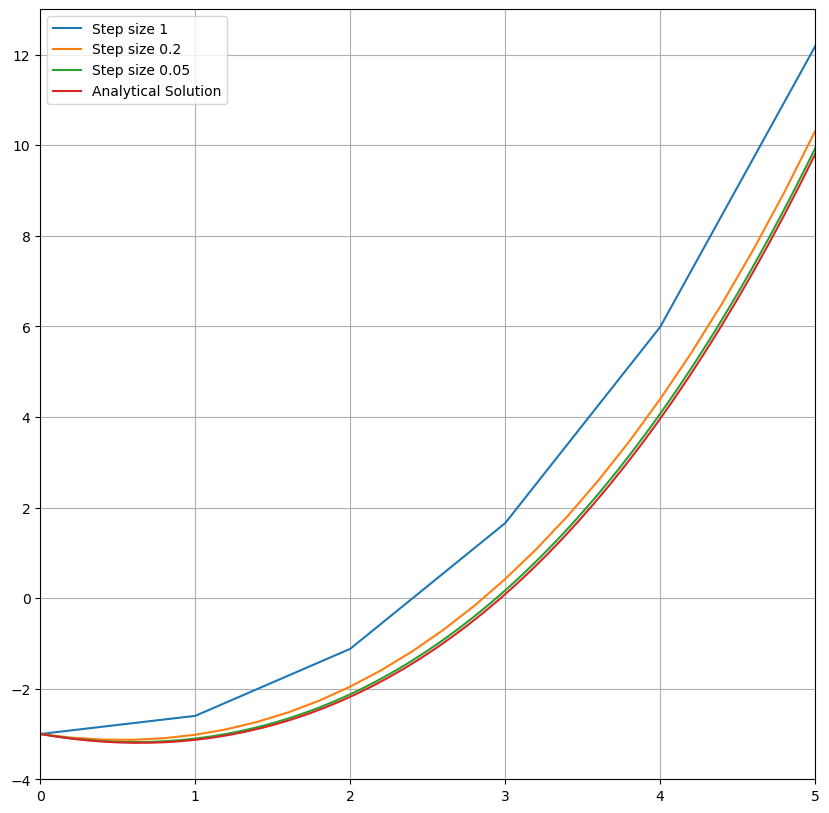

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

def eulerMethod(incrementValue):
    x = 0.0
    y = -3
    approximation = []
    approximation.append(np.array([x, y]))
    while x <= 6:
        x += incrementValue
        y = y + incrementValue * (x + y/5)
        approximation.append(np.array([x, y]))


    a,b = np.asarray(approximation).T
    plt.plot(a,b, label="Step size " + str(incrementValue))

def analyticalMethod(x):
    return (-5 * (x+5) + 22 * math.e**(x/5))

plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim(0, 5)
plt.ylim(-4, 13)
plt.grid(True)
plt.yscale('linear') 

eulerMethod(1)
eulerMethod(0.2)
eulerMethod(0.05)

x = np.linspace(0, 5)
plt.plot(x, analyticalMethod(x), label="Analytical Solution")

plt.legend()
plt.show()

# Analysis of Results
As can clearly be seen in the above graph, the smaller the step size that Euler's method uses, the closer the estimation will be to the analytical (true) solution, meaning it's more accurate, and the method is more robust. Theoretically, as the step size tends to 0, the relative and absolute error of the method also tends to 0.